In [ ]:
import numpy as np 
import matplotlib.pyplot as plt  
from scipy.interpolate import interp1d 	
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression 

In [ ]:
# Los datos fueron tomados de: Slipstreaming Mother Machine: A Microfluidic Device for
# Single-Cell Dynamic Imaging of Yeast

tiempo=[12,13,14,15,16,17,18,19,20,21] # unidades, horas 
OD=[0.0993333333333333,0.147666666666667,0.203,0.273,0.382333333333333,0.484333333333333,0.723333333333333,0.780333333333333,0.977666666666667,1.035]

Ntiempo=np.array(tiempo)
NOD=np.array(OD)

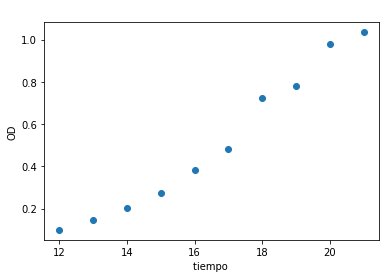

In [ ]:
plt.scatter(tiempo, OD)
plt.xlabel('tiempo ')
plt.ylabel('OD')
plt.title(' ')
plt.show() 

popt [  1.          -0.44174172 -17.3326412    1.33100617] pcov [[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


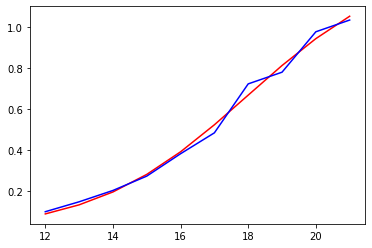

In [ ]:
#fit
def fsigmoid(x,a,b,c,k):
  return k*np.exp(-b*(x+c))/ (k + np.exp(-b*(x+c)))
xdata = np.linspace(5, 30, 30)
ydata = np.random.normal(size=len(xdata))
popt, pcov = curve_fit(fsigmoid, Ntiempo, NOD)
a=curve_fit(fsigmoid,Ntiempo,NOD)
print('popt',popt,'pcov', pcov)
plt.figure()
plt.plot(Ntiempo, fsigmoid(Ntiempo, *popt), 'r-', label='fit')
#plt.plot(x,y)
plt.plot(Ntiempo, NOD, 'b-', label='data')
plt.show()

In [ ]:
ylist=[]
for i in xdata:
  y=fsigmoid(i,1,-0.44174172,-17.3326412,1.33100617)
  ylist.append(y)

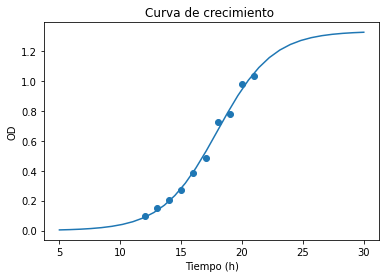

In [ ]:
plt.plot(xdata,ylist)
plt.scatter(tiempo, OD,)
plt.xlabel('Tiempo (h)')
plt.ylabel('OD')
plt.title('Curva de crecimiento ')
plt.show()

In [ ]:
#saca el logaritmo de OD 
LogOD=[]
for i in range(len(ylist)):
  lo=np.log(ylist[i])
  LogOD.append(lo)
print(LogOD)

[-5.45107175015681, -5.0717532289699125, -4.693122801858597, -4.31549483988708, -3.9393243138327683, -3.5652663050520483, -3.194256998962583, -2.827619868724963, -2.4671967179780236, -2.1154932388530137, -1.7758091834223726, -1.4522926007515387, -1.149823379334849, -0.8736203361986735, -0.6285246457832442, -0.4180702723819502, -0.24364921387473767, -0.10414727793479243, 0.0037627977730759024, 0.08482222494565736, 0.14424872831652294, 0.18698643658608818, 0.21727655667761922, 0.23851458301449419, 0.2532904923535506, 0.2635140101755327, 0.27056040525775443, 0.27540396721891097, 0.27872714820876443, 0.28100426714659255]


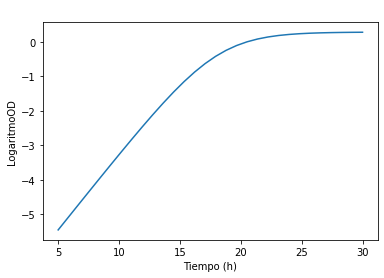

In [ ]:
#grafica de logaritmo de OD verus tiempo 
plt.plot(xdata, LogOD)
plt.xlabel('Tiempo (h)')
plt.ylabel('LogaritmoOD')
plt.title(' ')
plt.show() #mostar el grafico 

In [ ]:
#calcula la pendiente de la grafica del logaritmo de OD vs tiempo 
pendientes=[]
for i in range(len(LogOD)-1):
  y=LogOD[i+1]-LogOD[i]
  x=xdata[i+1]-xdata[i]
  pendiente=y/x
  pendientes.append(pendiente)
print(pendientes)
print(len(pendientes))

[0.44000948457680145, 0.43921129544912607, 0.43804843588695946, 0.43635781022300224, 0.4339072901856348, 0.4303707950637794, 0.425299071075639, 0.41809085486645015, 0.4079760357850121, 0.39403350429954337, 0.3752792358981671, 0.35086429684335985, 0.32039553003796456, 0.28431100088189665, 0.24412707314550183, 0.2023284278683664, 0.16182224569033637, 0.1251756878211277, 0.09402893552019442, 0.06893474391020403, 0.04957574159269565, 0.035136539306175975, 0.024636110550774942, 0.01714005483330544, 0.011859280673499287, 0.00817381829537718, 0.005618531874941581, 0.0038548899482300086, 0.002641457967880612]
29


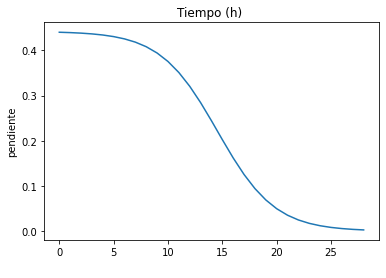

In [ ]:
#muestra la grafica de las pendientes respecto a sus posiciones 
plt.plot(pendientes)
plt.xlabel(' ')
plt.ylabel('pendiente')
plt.title('Tiempo (h) ')
plt.show() #mostar el grafico 

In [ ]:
#cacula el delta de pendiente porcentual 
deltapen=[]
for i in range(len(pendientes)-1):
  de=((pendientes[i+1]-pendientes[i])/pendientes[i])*100
  deltapen.append(de)
print(deltapen)
print(len(deltapen))

[-0.18140270963546812, -0.2647608506920336, -0.38594491509461704, -0.5615850066061856, -0.8150347324983638, -1.1784544969852715, -1.6948582067104736, -2.4192873304222298, -3.417487857746611, -4.7595618638356525, -6.505806002395584, -8.683917708218054, -11.262494564700125, -14.133792787387534, -17.121675502259052, -20.020015281482394, -22.646180512990565, -24.88242952212977, -26.687733378201393, -28.08308440621156, -29.125539674523203, -29.884641352699653, -30.427106998160912, -30.80955230986132, -31.07660978424796, -31.261845175598996, -31.389728953525076, -31.477733389160694]
28


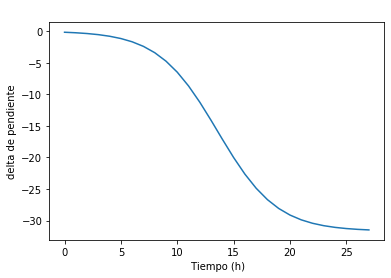

In [ ]:
plt.plot(deltapen)
plt.xlabel(' Tiempo (h)')
plt.ylabel('delta de pendiente')
plt.title(' ')
plt.show() 